<a href="https://colab.research.google.com/github/22041998/Rough-Works/blob/main/grp16_version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries for doing operations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the dataset for Social Media Analysis
url = 'https://dphi.s3.ap-south-1.amazonaws.com/dataset/test_age_dataset.csv'
data = pd.read_table(url)

In [ ]:
# displaying the data
data.head()

,"Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2"
0,"62683,33840667,2,1,0,0,0,0,0,0,0,0,0.033242075..."
1,"173104,1828421,2,1,0.001818182,0,0,0,0,0,0,0,0..."
2,"306061,57353310,2,1,0,0,0,0,0,0,0,0,0.19098436..."
3,"422061,36618563,2,2,0,0,0,4,0,0,0,0.130434783,..."
4,"219653,39484434,2,1,0,0,0,0,0,0,0,0,0.20525076..."


In [ ]:
# Converting the data into tabular form
data = pd.read_table(url, sep=',')

In [ ]:
# display the first 5 rows
data.head()

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
0,62683,33840667,2,1,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.000000,0.033242,4.500000,120.313571,0,0.000000,0.062992,0.0,0.000000,0.012598,0.000000,0.000000,0.062992,0.000000,0.0
1,173104,1828421,2,1,0.001818,0.0,0.0,0,0.0,0.0,0.0,0.000000,0.051057,9.500000,188.615500,0,0.000000,0.003636,0.0,0.000000,0.000727,0.000000,0.000000,0.003636,0.000000,0.0
2,306061,57353310,2,1,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.000000,0.190984,4.675676,86.572800,0,0.000000,1.028571,0.0,0.000000,0.211429,0.000000,0.000000,0.742857,0.314286,0.0
3,422061,36618563,2,2,0.000000,0.0,0.0,4,0.0,0.0,0.0,0.130435,0.460543,21.142857,44.439050,0,0.007937,0.166667,0.0,0.067460,0.006349,0.000000,0.111111,0.023810,0.031746,201.0
4,219653,39484434,2,1,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.000000,0.205251,2.689655,29.136643,0,0.000000,0.233871,0.0,0.116935,0.000000,0.233871,0.000000,0.000000,0.000000,0.0


In [ ]:
#Checking unique values
data.userId.nunique()

54320

Need to Remove the first attribute and making UserID as Index

In [ ]:
#changing the index
data.drop('Unnamed: 0',inplace=True,axis=1)

In [ ]:
# Checking the shape of our dataset
data.shape

(54320, 25)

We have 54320 rows and 25 columns in our dataset

**Mile Stone 1 completed :** Collected a dataset having 54320 rows and 25 attributes.

## **Data Preprocessing**

#####Checking for missing values

In [ ]:
# Checking the attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54320 entries, 0 to 54319
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   userId                           54320 non-null  int64  
 1   tier                             54320 non-null  int64  
 2   gender                           54320 non-null  int64  
 3   following_rate                   54320 non-null  float64
 4   followers_avg_age                54320 non-null  float64
 5   following_avg_age                54320 non-null  float64
 6   max_repetitive_punc              54320 non-null  int64  
 7   num_of_hashtags_per_action       54320 non-null  float64
 8   emoji_count_per_action           54320 non-null  float64
 9   punctuations_per_action          54320 non-null  float64
 10  number_of_words_per_action       54320 non-null  float64
 11  avgCompletion                    54320 non-null  float64
 12  avgTimeSpent      

In [ ]:
# Checking for the NULL Values
data.isna().sum()

userId                             0
tier                               0
gender                             0
following_rate                     0
followers_avg_age                  0
following_avg_age                  0
max_repetitive_punc                0
num_of_hashtags_per_action         0
emoji_count_per_action             0
punctuations_per_action            0
number_of_words_per_action         0
avgCompletion                      0
avgTimeSpent                       0
avgDuration                        0
avgComments                        0
creations                          0
content_views                      0
num_of_comments                    0
weekends_trails_watched_per_day    0
weekdays_trails_watched_per_day    0
slot1_trails_watched_per_day       0
slot2_trails_watched_per_day       0
slot3_trails_watched_per_day       0
slot4_trails_watched_per_day       0
avgt2                              0
dtype: int64

**No Null Values are present for the given dataset**

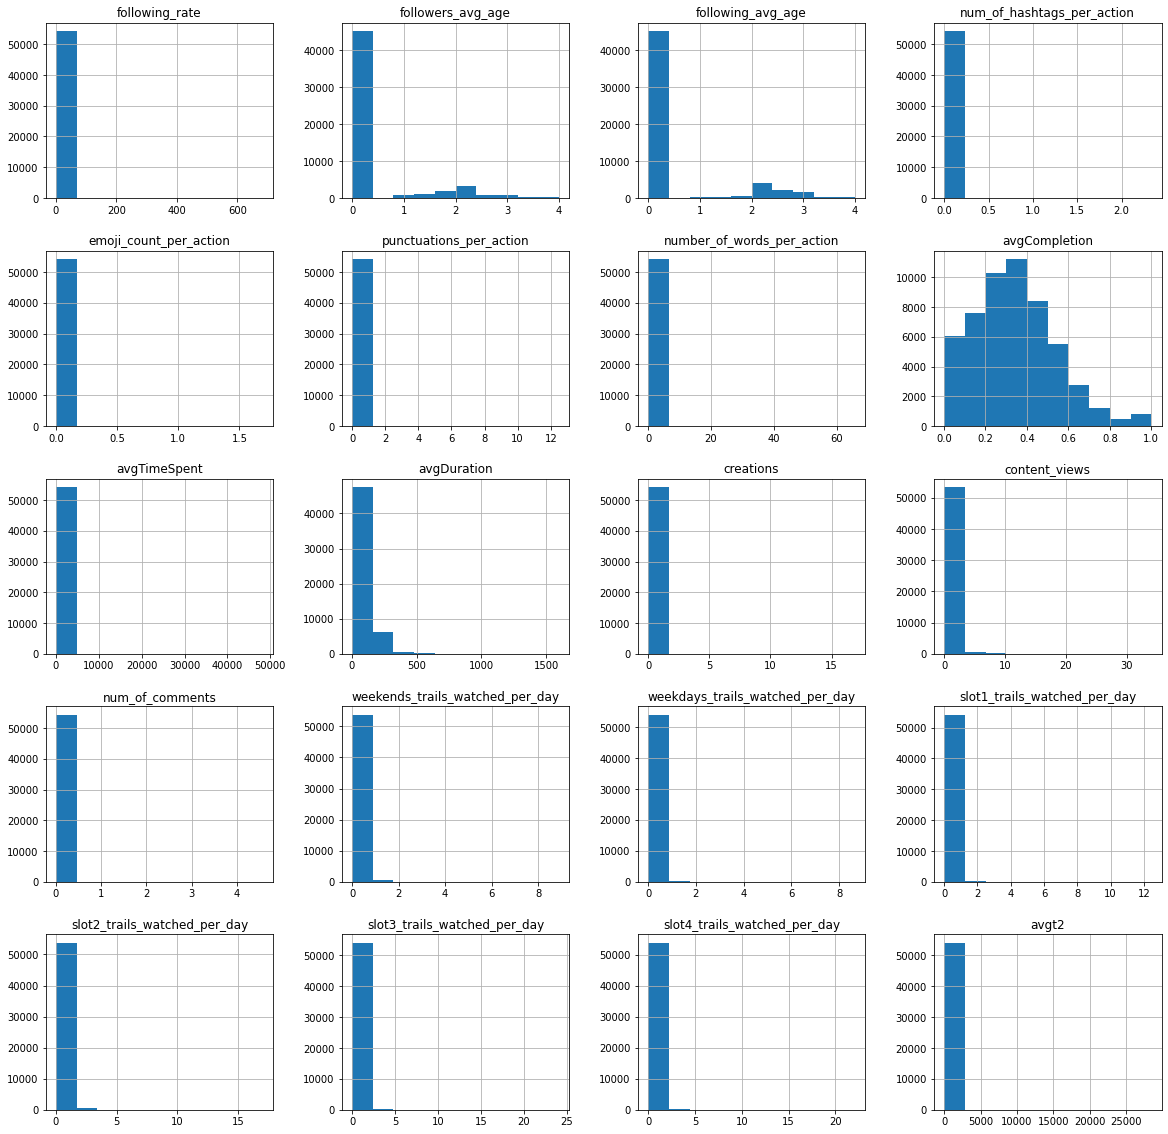

<Figure size 432x288 with 0 Axes>

In [ ]:
#Cheking skewness to plot frequency graph
frequency_graph=data.select_dtypes(include=['float'])
frequency_graph.hist(figsize=(20,20))
plt.show()
plt.tight_layout()

In [ ]:
#Checking the Stactical summary of the given dataset
data.describe()

,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
count,5.432000e+04,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000
mean,4.248125e+07,1.976105,1.211856,0.081204,0.344033,0.397432,0.734794,0.000357,0.000909,0.012117,0.178509,0.342335,18.350892,82.572262,0.322202,0.017718,0.393404,0.002133,0.075402,0.067343,0.032848,0.141784,0.152749,0.160141,158.286032
std,1.818136e+07,0.431142,0.408627,3.103205,0.813081,0.917988,2.822803,0.015529,0.017456,0.130576,0.600530,0.196584,245.222420,73.912128,4.606317,0.156423,0.929538,0.031136,0.212199,0.179688,0.175984,0.396400,0.481607,0.502513,920.210984
min,3.500000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000628,1.000000,0.767000,0.000000,0.000000,0.000873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.547567e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.199768,5.651071,30.447950,0.000000,0.000000,0.040816,0.000000,0.000000,0.002243,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.344565e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.329771,8.500000,62.443638,0.000000,0.000000,0.125000,0.000000,0.003968,0.015789,0.000000,0.011628,0.014493,0.015873,0.000000
75%,5.370713e+07,2.000000,1.000000,0.008621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.147100,0.460882,13.079052,112.135575,0.000000,0.009009,0.364427,0.000000,0.060000,0.058333,0.000000,0.117647,0.117647,0.125000,178.714286
max,7.904176e+07,3.000000,2.000000,685.277778,4.000000,4.000000,130.000000,2.333333,1.692308,12.500000,65.800000,1.000000,48286.500000,1600.786667,549.000000,16.915254,34.030303,4.575000,8.897959,8.672727,12.440000,17.060606,24.122449,22.096774,28474.333330


In [ ]:
#Getting coloumn name
data.columns


Index(['userId', 'tier', 'gender', 'following_rate', 'followers_avg_age',
       'following_avg_age', 'max_repetitive_punc',
       'num_of_hashtags_per_action', 'emoji_count_per_action',
       'punctuations_per_action', 'number_of_words_per_action',
       'avgCompletion', 'avgTimeSpent', 'avgDuration', 'avgComments',
       'creations', 'content_views', 'num_of_comments',
       'weekends_trails_watched_per_day', 'weekdays_trails_watched_per_day',
       'slot1_trails_watched_per_day', 'slot2_trails_watched_per_day',
       'slot3_trails_watched_per_day', 'slot4_trails_watched_per_day',
       'avgt2'],
      dtype='object')

In [ ]:
# Taking continuos variables to a new variable named data1
data1 = data.select_dtypes(include = 'float')
data1.columns

Index(['following_rate', 'followers_avg_age', 'following_avg_age',
       'num_of_hashtags_per_action', 'emoji_count_per_action',
       'punctuations_per_action', 'number_of_words_per_action',
       'avgCompletion', 'avgTimeSpent', 'avgDuration', 'creations',
       'content_views', 'num_of_comments', 'weekends_trails_watched_per_day',
       'weekdays_trails_watched_per_day', 'slot1_trails_watched_per_day',
       'slot2_trails_watched_per_day', 'slot3_trails_watched_per_day',
       'slot4_trails_watched_per_day', 'avgt2'],
      dtype='object')

#### Checking for outliers

Text(0.5, 1.0, 'Boxplot of Tier - City ')

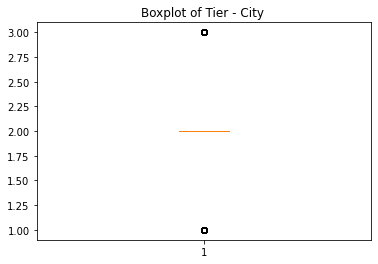

In [ ]:
#Boxplot to find out outlier
plt.boxplot(data['tier'])
plt.title('Boxplot of Tier - City ')

Text(0.5, 1.0, 'Boxplot of Gender ')

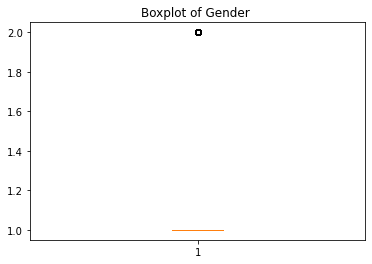

In [ ]:



#Boxplot to find out outlier
plt.boxplot(data['gender'])
plt.title('Boxplot of Gender ')

Text(0.5, 1.0, 'Boxplot of Followers Rate ')

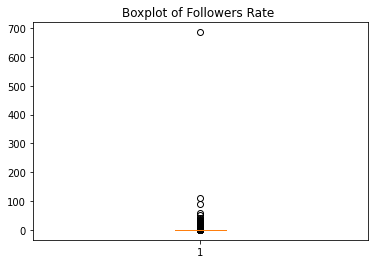

In [ ]:
#Boxplot to find out outlier
plt.boxplot(data['following_rate'])
plt.title('Boxplot of Followers Rate ')

Text(0.5, 1.0, 'Boxplot of Completion Rate ')

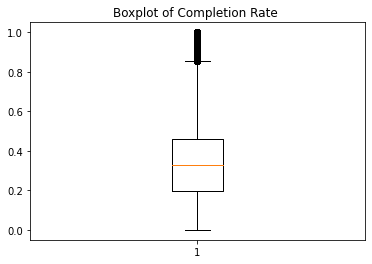

In [ ]:
#Boxplot to find out outlier
plt.boxplot(data['avgCompletion'])
plt.title('Boxplot of Completion Rate ')

In [ ]:
#Outlier present so we need to eliminate the same
Q1=np.percentile(data['avgCompletion'], 25, interpolation='midpoint')
Q2=np.percentile(data['avgCompletion'], 50, interpolation='midpoint')
Q3=np.percentile(data['avgCompletion'], 75, interpolation='midpoint')

In [ ]:
IQR=Q3-Q1

In [ ]:
low_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(low_limit)
print(upper_limit)


-0.19191168350000004
0.8525601844999999


In [ ]:
#Finding the Outliers in the Spirit_servings
outlier=[]
for x in data['avgCompletion']:
  if((x>upper_limit) or (x<low_limit)):
    outlier.append(x)
print(outlier)

[0.90116172, 0.9158580540000001, 1.0, 0.85756943, 1.0, 1.0, 1.0, 1.0, 0.9453262790000001, 1.0, 1.0, 1.0, 1.0, 1.0, 0.930172287, 1.0, 1.0, 1.0, 0.885851107, 1.0, 1.0, 0.943396226, 0.884977215, 1.0, 0.91833968, 0.9605263159999999, 0.8702905740000001, 1.0, 0.8770004220000001, 1.0, 1.0, 0.9358288770000001, 1.0, 0.9951475540000001, 0.883605599, 1.0, 1.0, 1.0, 0.8981420040000001, 1.0, 1.0, 0.864739835, 1.0, 1.0, 1.0, 1.0, 1.0, 0.941960597, 1.0, 1.0, 0.892857143, 1.0, 1.0, 1.0, 0.86827957, 1.0, 1.0, 1.0, 0.865691489, 1.0, 0.893333333, 0.864677907, 0.8626410090000001, 1.0, 1.0, 0.9149815459999999, 0.931497615, 0.9896467720000001, 1.0, 0.875987842, 0.8696409279999999, 1.0, 1.0, 1.0, 0.933369021, 1.0, 1.0, 1.0, 1.0, 0.928759894, 0.92989418, 1.0, 0.8570221640000001, 1.0, 1.0, 0.9002770379999999, 1.0, 0.994722955, 0.8643617020000001, 1.0, 1.0, 1.0, 1.0, 0.8968253970000001, 0.903601923, 0.885139821, 1.0, 0.927198291, 0.9731273359999999, 0.9844961240000001, 1.0, 1.0, 0.87135857, 0.9236137240000001, 

In [ ]:
# We have all the upper limit values as outliers
# finding the index values of outlier
ind1 = data['avgDuration'] > upper_limit
data.loc[ind1].index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            54310, 54311, 54312, 54313, 54314, 54315, 54316, 54317, 54318,
            54319],
           dtype='int64', length=54319)

In [ ]:
#Droping the values
data.drop(data.loc[ind1].index, inplace=True)

Text(0.5, 1.0, 'Boxplot of Completion Rate - AFTER REMOVAL ')

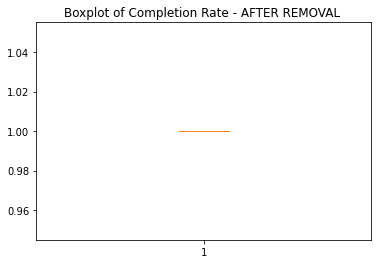

In [ ]:
#Boxplot to find out outlier
plt.boxplot(data['avgCompletion'])
plt.title('Boxplot of Completion Rate - AFTER REMOVAL ')

Text(0.5, 1.0, 'Boxplot of Average Rate of Time ')

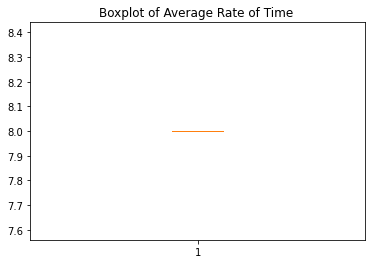

In [ ]:
#Boxplot to find out outlier
plt.boxplot(data['avgTimeSpent'])
plt.title('Boxplot of Average Rate of Time ')

Text(0.5, 1.0, 'Boxplot of Average Duration of Time ')

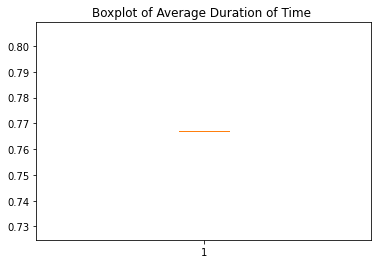

In [ ]:
#Boxplot to find out outlier
plt.boxplot(data['avgDuration'])
plt.title('Boxplot of Average Duration of Time ')

In [ ]:
#Outlier present so we need to eliminate the same
Q1=np.percentile(data['avgDuration'], 25, interpolation='higher')
Q2=np.percentile(data['avgDuration'], 50, interpolation='higher')
Q3=np.percentile(data['avgDuration'], 75, interpolation='higher')

In [ ]:
IQR=Q3-Q1


In [ ]:
low_limit=Q1-1.95*IQR
upper_limit=Q3+1.95*IQR
print(low_limit)
print(upper_limit)


In [ ]:
#Finding the Outliers in the Spirit_servings
outlier=[]
for x in data['avgDuration']:
  if((x>upper_limit) or (x<low_limit)):
    outlier.append(x)
print(outlier)

In [ ]:
# We have all the upper limit values as outliers
# finding the index values of outlier
ind1 = data['avgDuration'] > upper_limit
data.loc[ind1].index

In [ ]:
#Droping the values
data.drop(data.loc[ind1].index, inplace=True)

In [ ]:
#Boxplot to find out outlier
plt.boxplot(data['avgDuration'])
plt.title('Boxplot of Average Rate - After outlier reduction ')

In [ ]:
# Now we can see that our outliers are reduced.

In [ ]:
#Boxplot to find out outlier
plt.boxplot(data['weekdays_trails_watched_per_day'])
plt.title('Boxplot of weekdays_trails_watched_per_day  ')

In [ ]:
#Outlier present so we need to eliminate the same
Q1=np.percentile(data['weekdays_trails_watched_per_day'], 25, interpolation='nearest')
Q2=np.percentile(data['weekdays_trails_watched_per_day'], 50, interpolation='nearest')
Q3=np.percentile(data['weekdays_trails_watched_per_day'], 75, interpolation='nearest')

In [ ]:
IQR=Q3-Q1


In [ ]:
low_limit=Q1-1.99*IQR
upper_limit=Q3+1.99*IQR
print(low_limit)
print(upper_limit)


In [ ]:
#Finding the Outliers in the 'weekdays_trails_watched_per_day
outlier=[]
for x in data['weekdays_trails_watched_per_day']:
  if((x>upper_limit) or (x<low_limit)):
    outlier.append(x)
print(outlier)

In [ ]:
# We have all the upper limit values as outliers
# finding the index values of outlier
ind1 = data['weekdays_trails_watched_per_day'] > upper_limit
data.loc[ind1].index

In [ ]:
#Droping the values
data.drop(data.loc[ind1].index, inplace=True)

In [ ]:
#Boxplot to find out outlier
plt.boxplot(data['weekdays_trails_watched_per_day'])
plt.title('Boxplot of weekdays_trails_watched_per_day -After outlier reduction ')

Now we can see that out outliers are reduced

In [ ]:
#Boxplot to find out outlier
plt.boxplot(data['weekends_trails_watched_per_day'])
plt.title('Boxplot of Weekends')

In [ ]:
Q1=np.percentile(data['weekends_trails_watched_per_day'], 25, interpolation='nearest')
Q2=np.percentile(data['weekends_trails_watched_per_day'], 50, interpolation='nearest')
Q3=np.percentile(data['weekends_trails_watched_per_day'], 75, interpolation='nearest')
IQR=Q3-Q1

In [ ]:
low_limit=Q1-1.95*IQR
upper_limit=Q3+1.95*IQR
print(low_limit)
print(upper_limit)


In [ ]:
outlier=[]
for x in data['weekends_trails_watched_per_day']:
  if((x>upper_limit) or (x<low_limit)):
    outlier.append(x)
print(outlier)

In [ ]:
# We have all the upper limit values as outliers
# finding the index values of outlier
ind1 = data['weekends_trails_watched_per_day'] > upper_limit
data.loc[ind1].index

In [ ]:
#Droping the values
data.drop(data.loc[ind1].index, inplace=True)

In [ ]:
#Boxplot to find out outlier
plt.boxplot(data['weekends_trails_watched_per_day'])
plt.title('Boxplot of Weekends - After outlier reduction')

Now we can see that our outliers are reduced

####Feature reduction

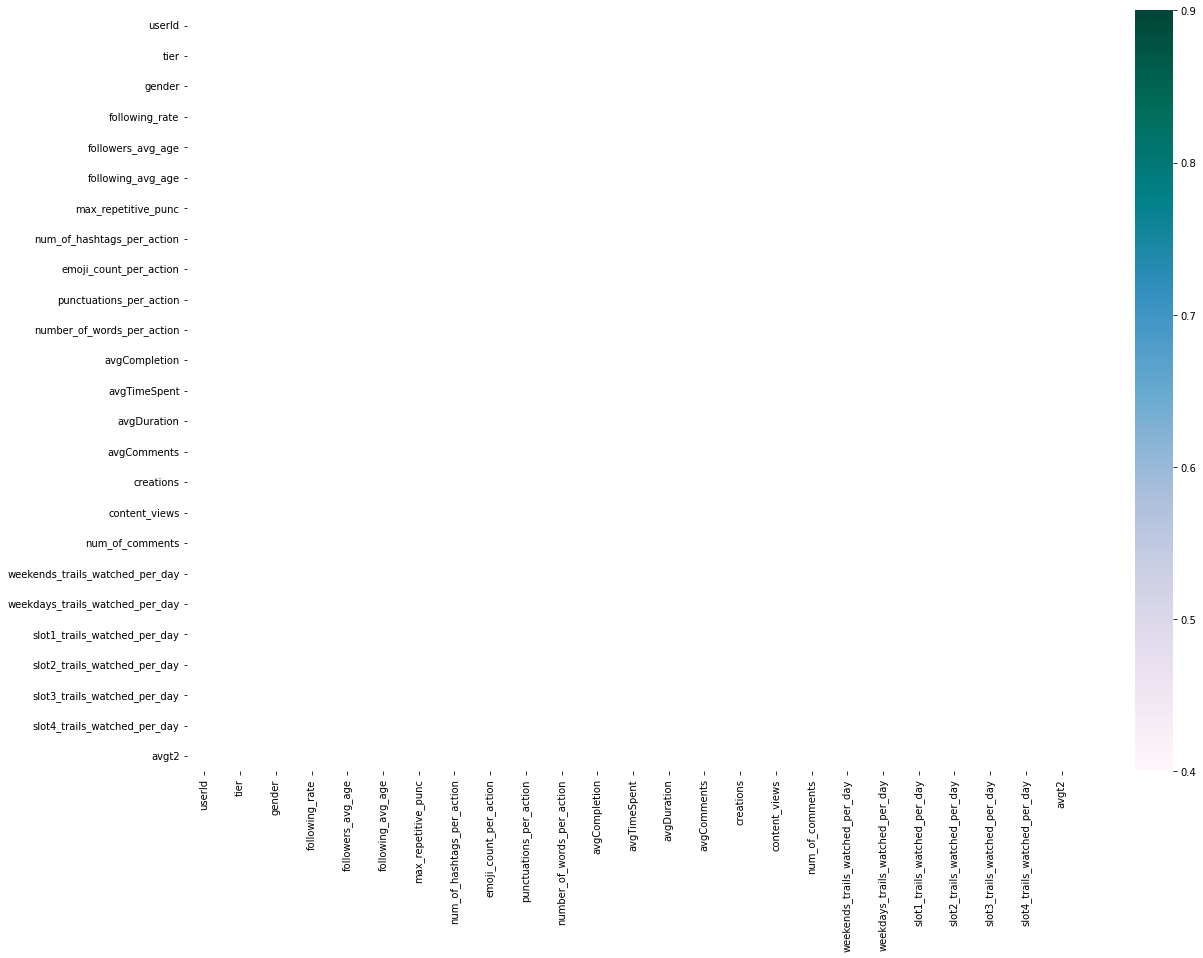

<Figure size 432x288 with 0 Axes>

In [ ]:
#Taking the corelation matrix
corelation_matrix=data.corr().round(3)
plt.subplots(figsize=(20,14))
sns.heatmap(corelation_matrix, vmin=0.4, vmax=0.9, annot=True, linewidths=0.2, cmap='PuBuGn')
plt.show()
plt.tight_layout()

In [ ]:
# Sorting values in correlation matrix
correlation_mat = data.corr()

corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

In [ ]:
#Data Droping due to low co-relation 
final_data=data.drop(['userId','max_repetitive_punc','punctuations_per_action','number_of_words_per_action','avgComments','creations','num_of_comments','content_views'],axis=1)

Removed the above attibutes from the table since it have less significant

In [ ]:
final_data.describe()

In [ ]:
#Taking the corelation matrix
corelation_matrix=final_data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corelation_matrix, vmin=0.004, vmax=0.8, annot=True, linewidths=0.2, cmap='PuBuGn')

In [ ]:
final_data.columns

In [ ]:
# Selecting our target variable and independent variables

# **Exploratory Data Analysis**

In [ ]:
# Let's draw a pie chart showing the genderwise representation
data['gender'].value_counts().plot.pie(label=('Genderwise Representation'),colormap='brg', autopct='%1.0f%%') 
plt.show()

We can infer that 80% of the people belongs to gender1.

In [ ]:
# plt.figure(figsize = (6,10))
# sns.countplot(data["tier"] )

In [ ]:
data.columns

In [ ]:
# Creating a cross tab based on tier and gender
pd.crosstab(data.gender, data.tier)  

In [ ]:
# Let's plot a bar graph
pd.crosstab(data.gender, data.tier).plot(kind='bar')  
plt.tight_layout()

All the categorical variables are highly imbalanced.

In [ ]:
data.head(8)

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(data['following_rate'], data['followers_avg_age'], s=10, c='brown')
plt.title('Relation b/w followers average age and following_rate', fontsize = 14)
plt.xlabel('following_rate')
plt.ylabel('followers_avg_age')

In [ ]:
data.columns

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(data['num_of_hashtags_per_action'], data['followers_avg_age'], s=12, c='violet', marker = "^")
plt.title('hashtag usage by age', fontsize = 16)
plt.xlabel('num_of_hashtags_per_action')
plt.ylabel('followers_avg_age')
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(data['avgTimeSpent'], data['following_rate'])
plt.title(' Time spent v/s following rate', fontsize = 16)
plt.xlabel('avgTimeSpent')
plt.ylabel('following_rate')

In [ ]:
data[['', '']].plot.hist()

In [ ]:
data1[['avgTimeSpent', 'avgCompletion']].plot.kde()

In [ ]:
sns.pairplot(data[['weekends_trails_watched_per_day', 'weekdays_trails_watched_per_day',
       'slot1_trails_watched_per_day', 'slot2_trails_watched_per_day',
       'slot3_trails_watched_per_day', 'slot4_trails_watched_per_day']], height = 3.5)
plt.tight_layout()

In [ ]:
data.columns

In [ ]:
sns.lineplot(
    data=data,
    x="avgDuration", y="avgComments", hue="gender",
    markers=True, dashes=False
)

In [ ]:
sns.lineplot(data=data,
    x="avgDuration", y="avgComments", hue="tier")